In [15]:
import pandas as pd
import numpy as np
from math import log2

# Sample data
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'medium', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(attribute):
    values, counts = np.unique(attribute, return_counts=True)
    probabilities = counts / len(attribute)
    return -np.sum(probabilities * np.log2(probabilities))

# Entropy of the whole dataset (target: 'buys_computer')
def entropy_of_target(target):
    return entropy(target)

# Function to calculate Information Gain
def information_gain(data, feature, target):
    # Entropy of the whole dataset (target)
    total_entropy = entropy_of_target(data[target])
    
    # Split data by unique values of the feature and calculate entropy for each subset
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values))])
    
    # Information Gain
    return total_entropy - weighted_entropy

# List of features
features = ['age', 'income', 'student', 'credit_rating']

# Calculate Information Gain for each feature
for feature in features:
    ig = information_gain(df, feature, 'buys_computer')
    print(f'Information Gain for {feature}: {ig:.4f}')

# Based on the IG, choose the feature with the highest value


Information Gain for age: 0.2467
Information Gain for income: 0.0292
Information Gain for student: 0.1518
Information Gain for credit_rating: 0.0481


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Encode categorical variables
df_encoded = pd.get_dummies(df.drop(columns=['buys_computer']))
target = df['buys_computer'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)

# Create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the depth of the tree
training_accuracy = model.score(X_train, y_train)
tree_depth = model.get_depth()

print(f'Training Accuracy: {training_accuracy:.2f}')
print(f'Tree Depth: {tree_depth}')


Training Accuracy: 1.00
Tree Depth: 4


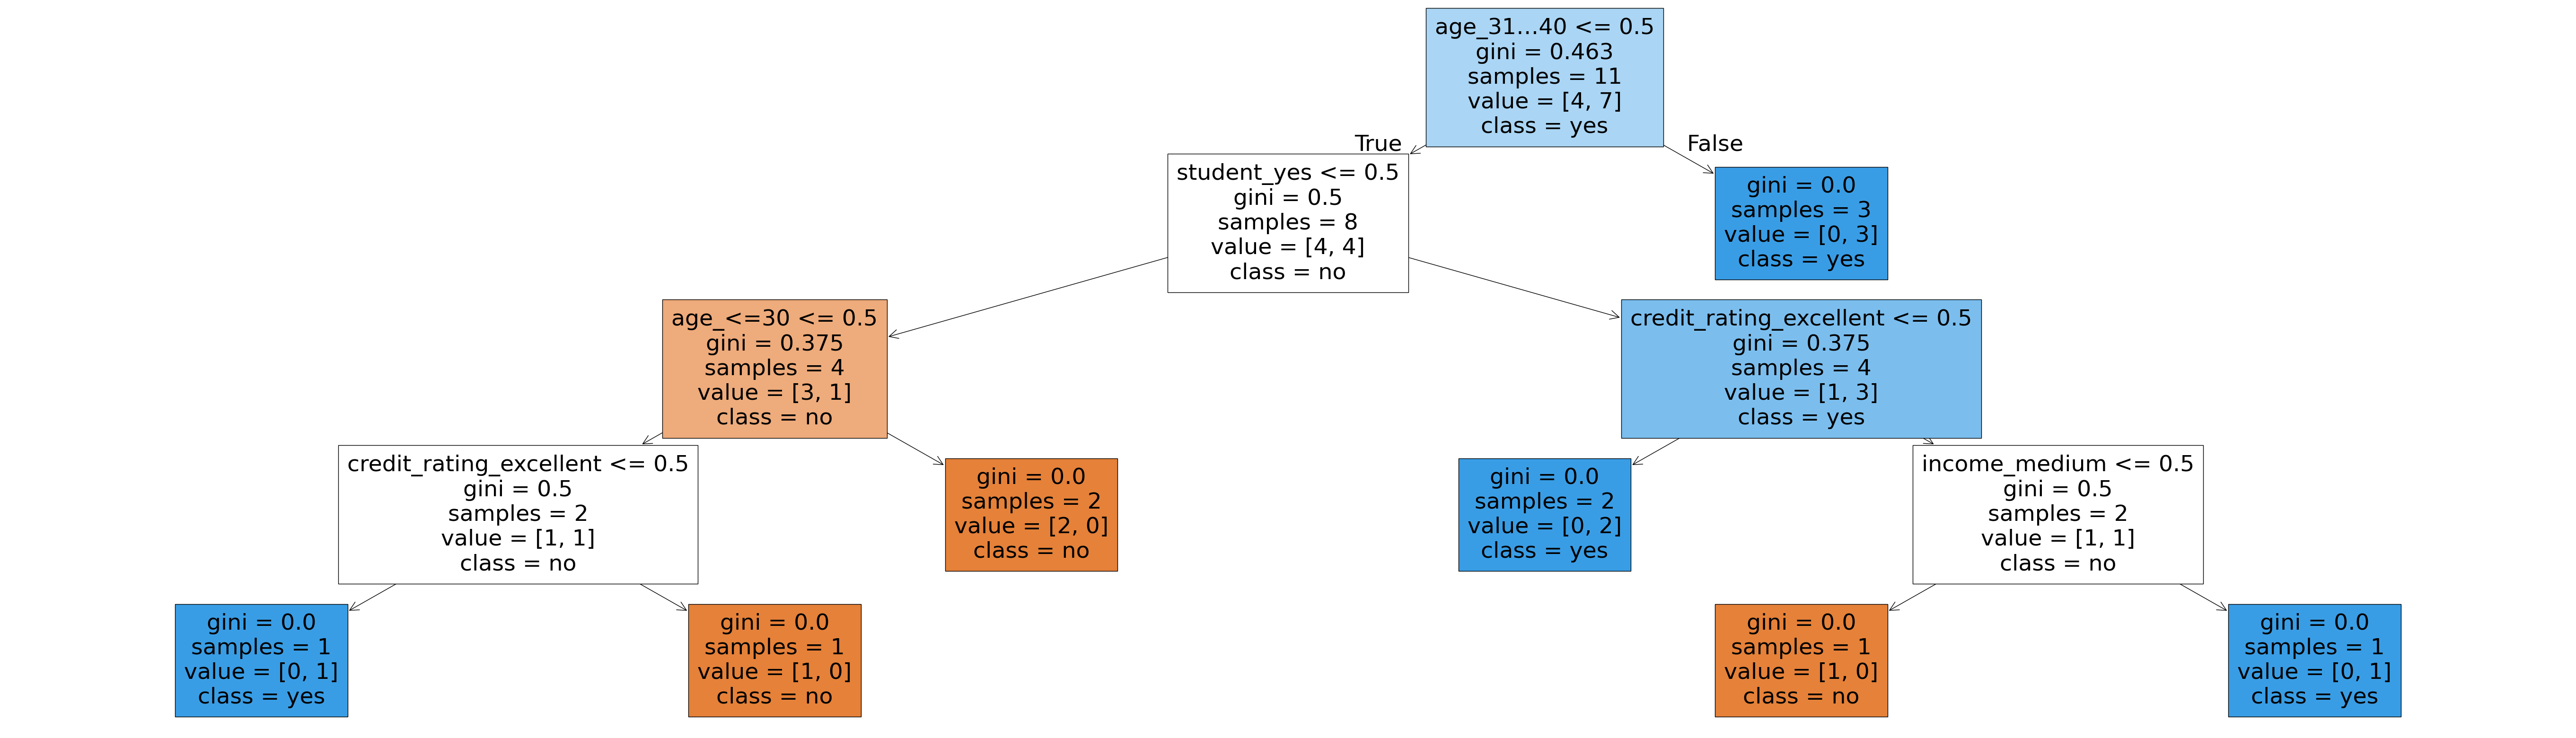

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=df_encoded.columns, class_names=['no', 'yes'])
plt.savefig('Decision_Tree_Visualization_Sample_Data.jpg', dpi=300)  # You can adjust the filename and DPI as needed

plt.show()


Training Accuracy: 1.00
Test Accuracy: 0.99


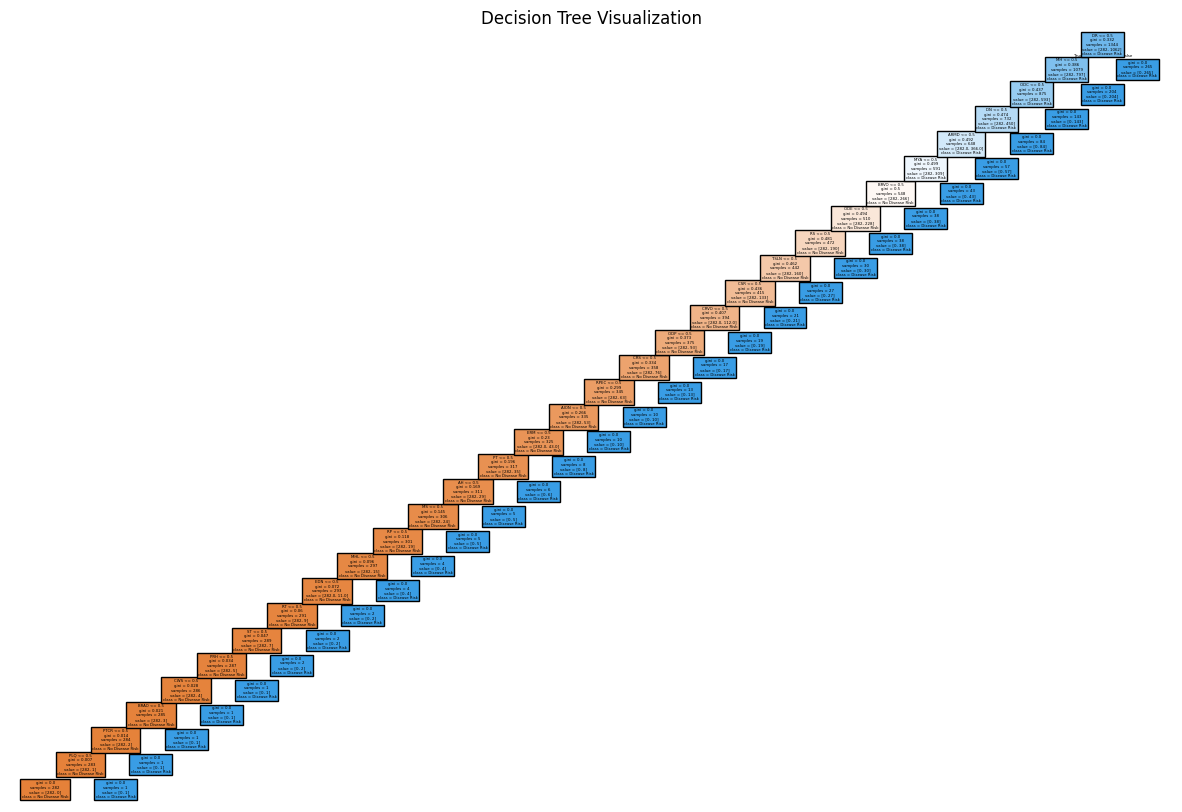

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load your dataset
dataset = pd.read_csv('RFMiD_Training_Labels.csv')

# Specify features and target variable
# Assuming 'Disease_Risk' is the target column
X = dataset.drop(columns=['ID', 'Disease_Risk'])  # Adjust as per your dataset
y = dataset['Disease_Risk']

# Split data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(Tr_X, Tr_y)

# Check accuracy for training and test data
train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Disease Risk", "Disease Risk"])
plt.title("Decision Tree Visualization")

# Save the plot as an image file
plt.savefig('Decision_Tree_Visualization.jpg', dpi=300)  # You can adjust the filename and DPI as needed
plt.show()


Training Accuracy with max_depth=5: 0.79
Test Accuracy with max_depth=5: 0.79


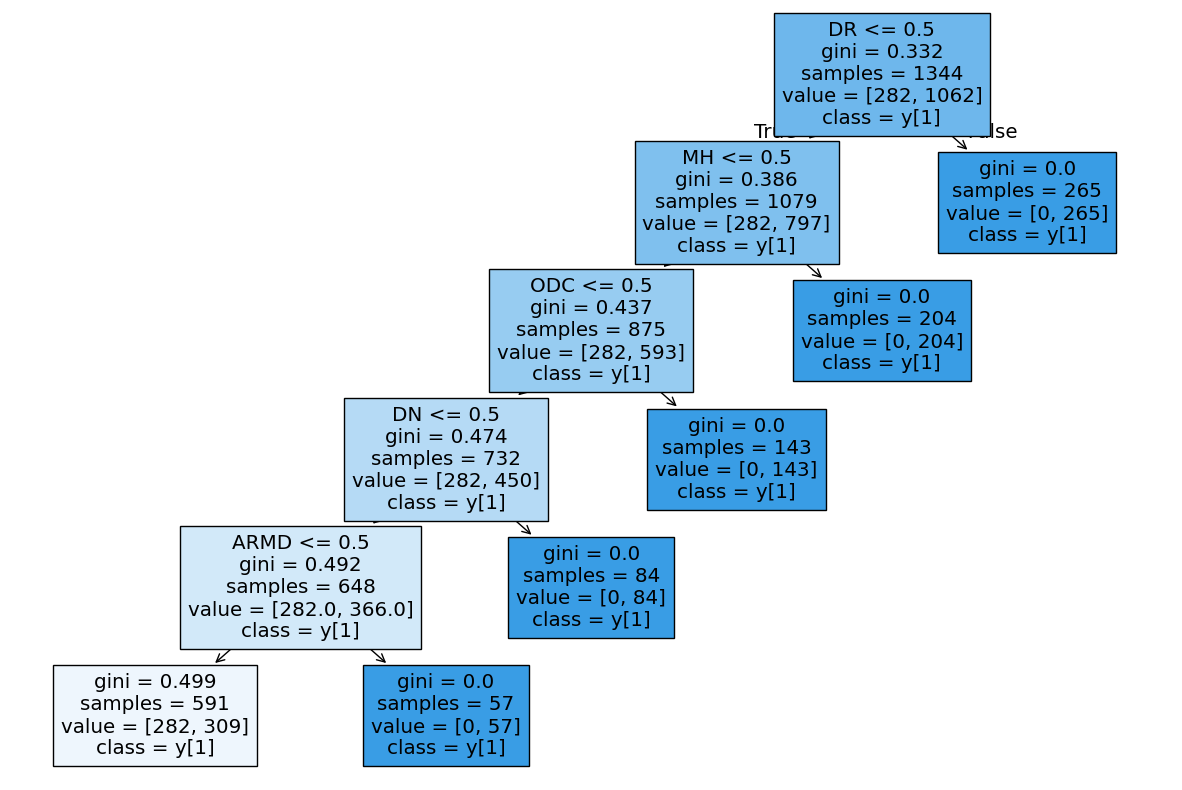

In [19]:
# Train a Decision Tree with max_depth constraint
model_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
model_depth.fit(Tr_X, Tr_y)

# Check accuracy for training and test data with depth constraint
train_accuracy_depth = model_depth.score(Tr_X, Tr_y)
test_accuracy_depth = model_depth.score(Te_X, Te_y)

print(f'Training Accuracy with max_depth=5: {train_accuracy_depth:.2f}')
print(f'Test Accuracy with max_depth=5: {test_accuracy_depth:.2f}')

# Visualize the Decision Tree with max_depth constraint
plt.figure(figsize=(15,10))
plot_tree(model_depth, filled=True, feature_names=X.columns, class_names=True)
plt.savefig('Decision Tree with max_depth constraint.jpg', dpi=300)  # You can adjust the filename and DPI as needed

plt.show()


Training Accuracy with entropy: 0.79
Test Accuracy with entropy: 0.79


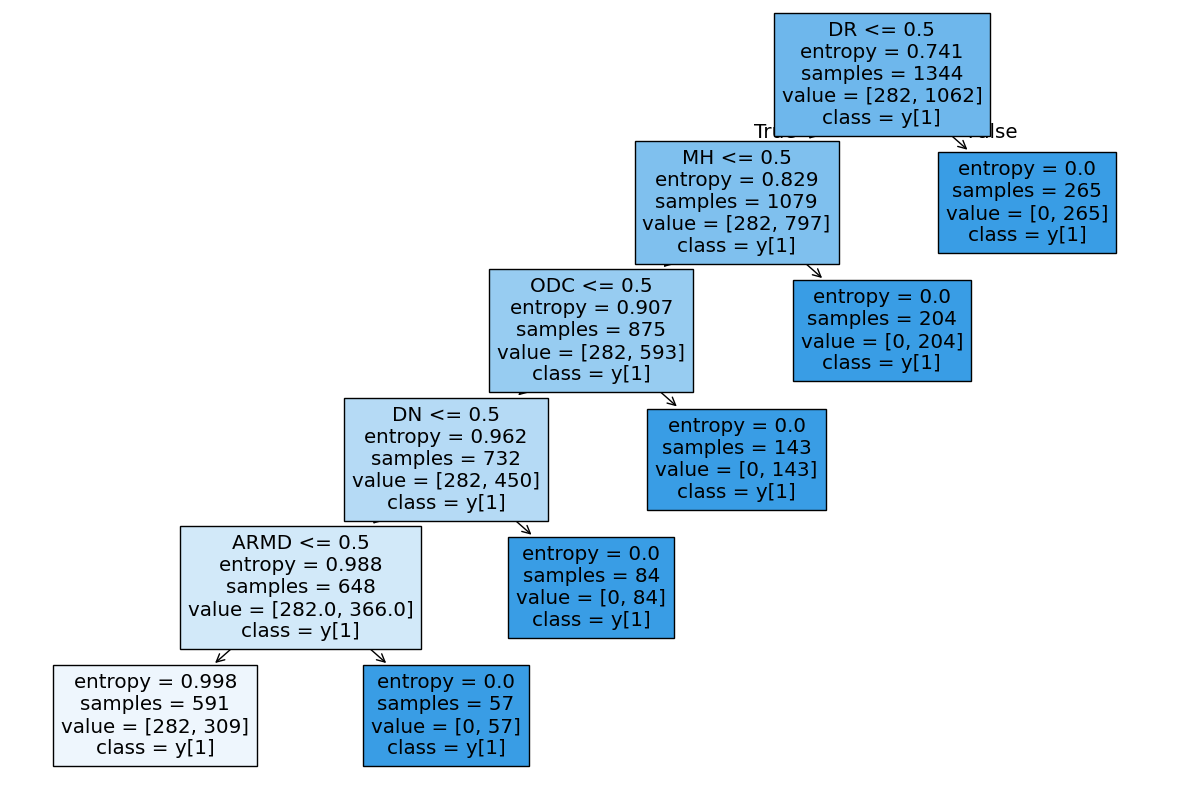

In [20]:
# Train a Decision Tree with criterion="entropy"
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
model_entropy.fit(Tr_X, Tr_y)

# Check accuracy for training and test data with entropy criterion
train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print(f'Training Accuracy with entropy: {train_accuracy_entropy:.2f}')
print(f'Test Accuracy with entropy: {test_accuracy_entropy:.2f}')

# Visualize the Decision Tree with entropy criterion
plt.figure(figsize=(15,10))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=True)
plt.savefig('Decision Tree with entropy criterion.jpg', dpi=300)  # You can adjust the filename and DPI as needed

plt.show()
